<a href="https://colab.research.google.com/github/Audrey-ai/Carrefour-Kenya-Data-Analysis-using-R/blob/main/Part_3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

Working as a data scientist at Carrefour Kenya, the main aim is to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax) by performing various unsupervised learning techniques and later providing recommendations based on your insights.


This section of the project will require that you create association rules that will allow you to identify relationships between variables in the dataset and provide insights from the analysis.

#2. Reading and checking of data

In [1]:
#Installing the required packages

install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [36]:
#Loading the dataset
#

Sales <- read.transactions('/content/Supermarket_Sales_Dataset II.csv',sep=',')
Sales

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [37]:
#Checking the class of transactions

class(Sales)

[1] "transactions"
attr(,"package")
[1] "arules"

In [38]:
#Previewing the items that make up our dataset
# 

items <- as.data.frame(itemLabels(Sales))
colnames(items) <- 'Items' 
head(items, 10)    

,Items
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


#3. Exploratory Data Analysis

In [40]:
#Generating a summary of the transaction dataset

summary(Sales)

#We see the most frequent items are: mineral water,eggs,spaghetti and french fries
#and the number of items purchased in each transaction 

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [41]:
# Exploring the frequency of some articles 
# i.e. transacations ranging from 8 to 10 and performing 
# some operation in percentage terms of the total transactions 

itemFrequency(Sales[, 8:10],type = "absolute")
round(itemFrequency(Sales[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
        107          69          86

black tea blueberries  body spray 
       1.43        0.92        1.15

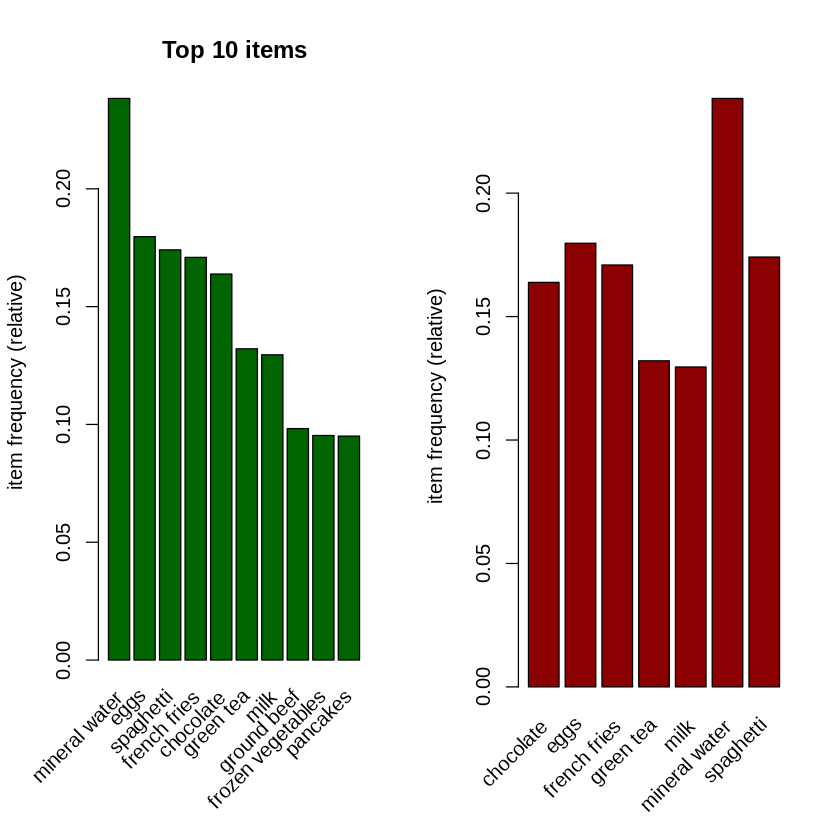

In [43]:
#Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
# 
par(mfrow = c(1, 2))


# plot the frequency of items
itemFrequencyPlot(Sales, topN = 10,col="darkgreen",main='Top 10 items')
itemFrequencyPlot(Sales, support = 0.1,col="darkred")



#4. Building Association Rules Model

In [44]:
# Building a model based on association rules 
# using the apriori function
#
# We use Min Support as 0.001 and confidence as 0.8
# 

rules <- apriori (Sales, parameter = list(supp = 0.001, conf = 0.8))
rules


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 74 rules 

In [45]:
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (Sales,parameter = list(supp = 0.002, conf = 0.8))
rules2 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2 rules 

In [46]:
#Building apriori model with Min Support as 0.002 and confidence as 0.6

rules3 <- apriori (Sales, parameter = list(supp = 0.001, conf = 0.6))
rules3 


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 545 rules 

In our first example, we increased the minimum support of 0.001 to 0.002 and model rules went from 74 to only 2. This would lead us to understand that using a high level of support can make the model lose interesting rules. In the second example, we decreased the minimum confidence level to 0.6 and the number of model rules went from 74 to 545. This would mean that using a low confidence level increases the number of rules to quite an extent and many will not be useful.

In [47]:
# We can perform an exploration of our model 
# through the use of the summary function as shown
#
 
summary(rules)

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
  data ntransactions support confidence
 Sales          7501   0.001        0.8

Upon running the above summary code, the function would give us information about the model i.e. the size of rules, depending on the items that contain these rules. In our above case, most rules have 2 and 3 items though some rules do have upto 4. More statistical information such as support, lift and confidence is also provided.


In [48]:
#Observing rules built in our model i.e. first 5 model rules
# 
inspect(rules[1:5])


# Interpretation of the first rule:
# ---
# If someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too
#If someone  buys bacon and pancakes, they are 81% likely to buy spaghetti too, etc.
# ---

    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [49]:
#Ordering these rules by a criteria such as the level of confidence
#then looking at the first five rules.
# 

rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])

# Interpretation
# ---
# The top 4 rules indicate 100% confidence that the associated items are bought by someone
# 
# ---

    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [51]:
#If we're interested in making a promotion relating to the sale of milk, 
#we could create a subset of rules concerning these products 
#---
#This would tell us the items that the customers bought before purchasing milk
# ---
# 

milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk <- sort(milk, by="confidence", decreasing=TRUE)
inspect(milk[1:5])

#We can be able to see the items that were bought before perchasing milk
#At a confidence of 100%. Such are cake,meatballs and mineral water.

    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


In [52]:
#What if we wanted to determine items that customers might buy 
#who have previously bought milk?
# ---
#
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk <- sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[15:19])


#We see mineral water, spaghetti and french fries in the list

    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    


#5. Conclusion on association Rules

We were able to build association rules model that allows the identification of relationships between variables in the dataset.Some of the things we are able to tell from one of the rules is that if someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too. Using milk as example we can see that the items that were bought before perchasing milk are cake,meatballs and mineral water at a confidence of 100%. 

Most important while performing Exploratory Data Analysis we can see that the most frequent bought items are: mineral water, eggs, spaghetti, french fries and chocolate.